<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Where-are-the-NFL-Teams-Located-?" data-toc-modified-id="Where-are-the-NFL-Teams-Located-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Where are the NFL Teams Located ?</a></span></li><li><span><a href="#Who-has-won-the-Superbowl-most-times-?" data-toc-modified-id="Who-has-won-the-Superbowl-most-times-?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Who has won the Superbowl most times ?</a></span></li><li><span><a href="#How-many-times-the-teams-have-reached-the-Superbowl-?" data-toc-modified-id="How-many-times-the-teams-have-reached-the-Superbowl-?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How many times the teams have reached the Superbowl ?</a></span></li><li><span><a href="#Who-has-won-consecutively-two-times-?" data-toc-modified-id="Who-has-won-consecutively-two-times-?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Who has won consecutively two times ?</a></span></li><li><span><a href="#Who-has-lost-consecutively-two-times-?" data-toc-modified-id="Who-has-lost-consecutively-two-times-?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Who has lost consecutively two times ?</a></span></li><li><span><a href="#Who-has-been-on-Superbowl-but-never-won-?" data-toc-modified-id="Who-has-been-on-Superbowl-but-never-won-?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Who has been on Superbowl but never won ?</a></span></li><li><span><a href="#Who-has-never-been-to-Superbowl-?" data-toc-modified-id="Who-has-never-been-to-Superbowl-?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Who has never been to Superbowl ?</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image

import plotly.plotly as py

import matplotlib.pyplot as plt
%matplotlib inline

# Where are the NFL Teams Located ?

In [2]:
tables_url = r'https://en.wikipedia.org/wiki/National_Football_League'
df_tables = pd.read_html(tables_url)
df = df_tables[2]
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

# remove rows if it has more than 4 nans
df = df.dropna(thresh=4)

# clean hdr
df.columns = df.columns.str.replace('[\[\] \d+]', '')

# if Headcoach is nan shift row values to right
df[df['Headcoach'].isnull()] = df[df['Headcoach'].isnull()].shift(1, axis=1)

# fill division names
df['Division'] = df['Division'].ffill()

# change datatypes
df['Capacity'] = df['Capacity'].astype(int)

# latitude N is +ve and S is -ve
df['latitude'] = df['Coordinates'].str.extract(r'/\s*(.*)°N')[0].str.encode('ascii',errors='ignore').astype(float)

# longitude E is +ve and W is -ve
df['longitude'] = df['Coordinates'].str.extract(r'°N\s*(.*)\s*°W')[0].str.encode('ascii',errors='ignore').astype(float) * -1

# create color column
df['color'] = df['Division'].map({'East': 0, 'North': 1, 'West': 2, 'South': 3})


# for later purpose
nfl_teams = df.copy()

df.head(6)

,Division,Club,City,Stadium,Capacity,Coordinates,Firstseason,Headcoach,latitude,longitude,color
2,East,Buffalo Bills,"Orchard Park, New York",New Era Field,71608,42°46′26″N 78°47′13″W﻿ / ﻿42.774°N 78.787°W,"1960 (AFL), 1970 (NFL)",Sean McDermott,42.774,-78.787,0
3,East,Miami Dolphins,"Miami Gardens, Florida",Hard Rock Stadium,64767,25°57′29″N 80°14′20″W﻿ / ﻿25.958°N 80.239°W,"1966 (AFL), 1970 (NFL)",Brian Flores,25.958,-80.239,0
4,East,New England Patriots,"Foxborough, Massachusetts",Gillette Stadium,65878,42°05′28″N 71°15′50″W﻿ / ﻿42.091°N 71.264°W,"1960 (AFL), 1970 (NFL)",Bill Belichick,42.091,-71.264,0
5,East,New York Jets,"East Rutherford, New Jersey",MetLife Stadium[C],82500,40°48′50″N 74°04′26″W﻿ / ﻿40.814°N 74.074°W,"1960 (AFL), 1970 (NFL)",Adam Gase,40.814,-74.074,0
6,North,Baltimore Ravens,"Baltimore, Maryland",M&T Bank Stadium,71008,39°16′41″N 76°37′23″W﻿ / ﻿39.278°N 76.623°W,1996[D],John Harbaugh,39.278,-76.623,1
7,North,Cincinnati Bengals,"Cincinnati, Ohio",Paul Brown Stadium,65515,39°05′42″N 84°30′58″W﻿ / ﻿39.095°N 84.516°W,"1968 (AFL), 1970 (NFL)",Zac Taylor,39.095,-84.516,1


In [3]:
import plotly.plotly as py
import pandas as pd

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['Club'] + ' (' + df['City'] + ')' ,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Jet',
            cmin = 0,
            color = df['color'],
            cmax = 4,
            colorbar=dict(
                title="NFL Teams"
            )
        ))]

layout = dict(
        title = 'NFL Teams (East=brown, North=orange, West=green, South=blue)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='file1' )

/Users/poudel/miniconda3/envs/viz/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



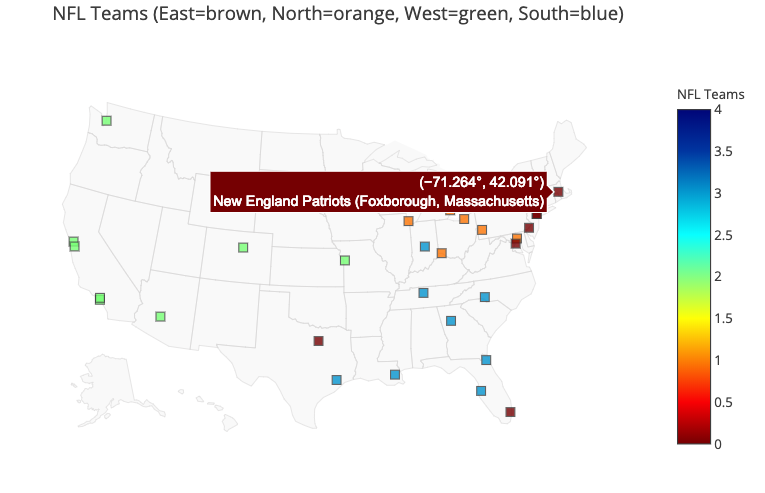

In [4]:
Image('nfl_teams.png')

# Who has won the Superbowl most times ?

In [5]:
# read wikipedia tables
tables_url = r'https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions'
df_tables = pd.read_html(tables_url)
df = df_tables[1]
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

# only take rows upto today
df = df.iloc[0:-6,:]

# change game to number
df['Game'] = df.index

# rename cols
df = df.rename({'Winning team': 'Winner','Losing team': 'Loser'},axis=1)

# change date
# February 4, 2024 [note 5]
df['Date'] = df['Date'].str.extract(r'(.*, \d{4})')
df['Date'] = pd.to_datetime(df['Date'],format='%B %d, %Y')

# drop ref
df = df.drop('Ref',1)

# extract winner and loser
df['Winner'] = df['Winner'].str.extract(r'([A-Za-z.49 ]*)')
df['Loser'] = df['Loser'].str.extract(r'([A-Za-z.49 ]*)')

# goal for and against
df['GF'] = df['Score'].str.extract(r'(\d+)').astype(int)
df['GA'] = df['Score'].str.extract(r'–(\d+)').astype(int) # – is not minus sign
df['GD'] = df['GF'] - df['GA']

# venue
df['Venue'] = df['Venue'].str.extract(r'([\w\s\'\.]*)')

# create city and state columns
df = df.rename({'City': 'City2'},axis=1)
df['City'] = df['City2'].str.extract(r'(.+),')
df['State'] = df['City2'].str.extract(r',([\w\s]*)')
df['City'] = df['City'].str.strip()
df['State'] = df['State'].str.strip()
df = df.drop('City2',1)

# data types
df['Attendance'] = df['Attendance'].astype(int)

# drop columns
df = df.drop('Score',1)

display(df.head(), df.tail())

,Game,Date,Winner,Loser,Venue,Attendance,GF,GA,GD,City,State
1,1,1967-01-15,Green Bay Packers,Kansas City Chiefs,Los Angeles Memorial Coliseum,61946,35,10,25,Los Angeles,California
2,2,1968-01-14,Green Bay Packers,Oakland Raiders,Miami Orange Bowl,75546,33,14,19,Miami,Florida
3,3,1969-01-12,New York Jets,Baltimore Colts,Miami Orange Bowl,75389,16,7,9,Miami,Florida
4,4,1970-01-11,Kansas City Chiefs,Minnesota Vikings,Tulane Stadium,80562,23,7,16,New Orleans,Louisiana
5,5,1971-01-17,Baltimore Colts,Dallas Cowboys,Miami Orange Bowl,79204,16,13,3,Miami,Florida


,Game,Date,Winner,Loser,Venue,Attendance,GF,GA,GD,City,State
49,49,2015-02-01,New England Patriots,Seattle Seahawks,University of Phoenix Stadium,70288,28,24,4,Glendale,Arizona
50,50,2016-02-07,Denver Broncos,Carolina Panthers,Levi's Stadium,71088,24,10,14,Santa Clara,California
51,51,2017-02-05,New England Patriots,Atlanta Falcons,NRG Stadium,70807,34,28,6,Houston,Texas
52,52,2018-02-04,Philadelphia Eagles,New England Patriots,U.S. Bank Stadium,67612,41,33,8,Minneapolis,Minnesota
53,53,2019-02-03,New England Patriots,Los Angeles Rams,Mercedes,70081,13,3,10,Atlanta,Georgia


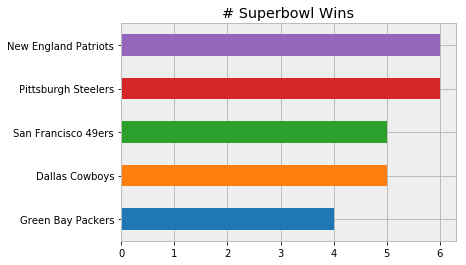

In [6]:
df['Winner'].value_counts().head().sort_values().plot.barh(title='# Superbowl Wins');
plt.savefig('won_superbowl.png')
plt.show()

# How many times the teams have reached the Superbowl ?

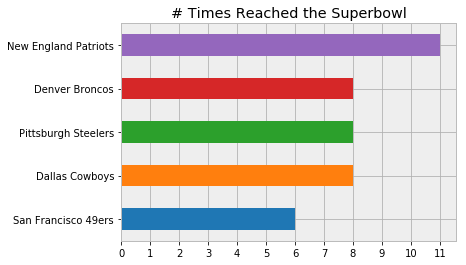

In [7]:
finalists = np.union1d(df['Winner'].values, df.Loser.values)

# winner and loser counts
wc = df.Winner.value_counts().sort_index()
lc = df.Loser.value_counts().sort_index()

# finalists
finalists = (wc + lc).fillna(1).astype(int).sort_index()
finalists = finalists.sort_values()

# plot
finalists.sort_values().tail().plot.barh(title='# Times Reached the Superbowl')
plt.savefig('reached_superbowl.png')
plt.xticks(range(12));

# Who has won consecutively two times ?

In [8]:
cond = df['Winner'] != df['Winner'].shift()
cond = cond.cumsum()
df['consecutiveWin'] = df['Winner'].groupby(cond).transform('size')

df1 = df[df['consecutiveWin'] == 2][['Game','Date','Winner','Loser','consecutiveWin']]

df1 = (df1.query('consecutiveWin > 1')
          .groupby('Winner')
          .agg({'Game': 'first', 
                'Date': ['first', 'last']})
          .reset_index()
)

# flatten multi-index column
df1.columns = [i[0]+'_'+i[1] if i[1] else i[0] for i in df1.columns.ravel()]
df1.columns = ['Winner', 'Game', 'BeginDate', 'EndDate']

# df1
df1.sort_values(by='BeginDate').reset_index(drop=True)

,Winner,Game,BeginDate,EndDate
0,Green Bay Packers,1,1967-01-15,1968-01-14
1,Miami Dolphins,7,1973-01-14,1974-01-13
2,Pittsburgh Steelers,9,1975-01-12,1980-01-20
3,San Francisco 49ers,23,1989-01-22,1990-01-28
4,Dallas Cowboys,27,1993-01-31,1994-01-30
5,Denver Broncos,32,1998-01-25,1999-01-31
6,New England Patriots,38,2004-02-01,2005-02-06


# Who has lost consecutively two times ?

In [9]:
cond = df['Loser'] != df['Loser'].shift()
cond = cond.cumsum()
df['consecutiveLoss'] = df['Loser'].groupby(cond).transform('size')

df1 = df[df['consecutiveLoss'] == 2][['Game','Date','Winner','Loser',
                                      'consecutiveWin','consecutiveLoss']]

df1 = (df1.query('consecutiveLoss > 1')
          .groupby('Loser')
          .agg({'Game': 'first', 
                'Date': ['first', 'last']})
          .reset_index())

# flatten multi-index column
df1.columns = [i[0]+'_'+i[1] if i[1] else i[0] for i in df1.columns.ravel()]
df1.columns = ['Loser', 'Game', 'BeginDate', 'EndDate']

# df1
df1.sort_values(by='BeginDate').reset_index(drop=True)

,Loser,Game,BeginDate,EndDate
0,Minnesota Vikings,8,1974-01-13,1975-01-12
1,Denver Broncos,21,1987-01-25,1988-01-31


# Who has been on Superbowl but never won ?

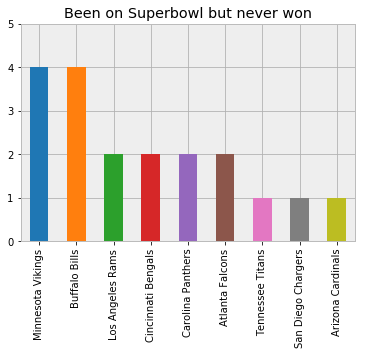

In [10]:
final_teams = np.union1d(df['Winner'].values, df['Loser'].values)
winner_unq = df['Winner'].unique()
not_winner = [i for i in final_teams if i not in winner_unq]

df['Loser'].value_counts()[not_winner].sort_values(ascending=False).plot.bar()
plt.yticks(range(6));
plt.title('Been on Superbowl but never won')
plt.savefig('been_but_never_won.png')

# Who has never been to Superbowl ?

In [11]:
all_teams = nfl_teams['Club'].values
all_teams = [i.replace('*',''.replace('†','')).replace('†','') for i in all_teams]
final_teams = final_teams

never_final = np.setdiff1d(all_teams, final_teams)
never_final

array(['Cleveland Browns', 'Detroit Lions', 'Houston Texans',
       'Jacksonville Jaguars', 'Los Angeles Chargers'], dtype='<U20')

In [12]:
# Note that Los Angeles Chargers was previously known as San Diego Chargers
# and has been to superbowl.
df[df['Loser'] == 'San Diego Chargers']

,Game,Date,Winner,Loser,Venue,Attendance,GF,GA,GD,City,State,consecutiveWin,consecutiveLoss
29,29,1995-01-29,San Francisco 49ers,San Diego Chargers,Joe Robbie Stadium,74107,49,26,23,Miami Gardens,Florida,1,1


In [13]:
never_final = np.delete(never_final, [4])
never_final

array(['Cleveland Browns', 'Detroit Lions', 'Houston Texans',
       'Jacksonville Jaguars'], dtype='<U20')

In [14]:
len(never_final)

4

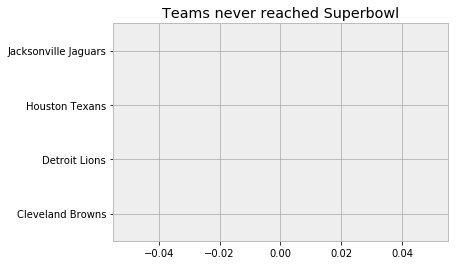

In [15]:
s = pd.Series(0,index=never_final)
s.plot.barh(title='Teams never reached Superbowl')
plt.savefig('never_reached.png')

In [16]:
nvf = pd.DataFrame({'Team': never_final, 'Apperances': 0})
nvf

,Team,Apperances
0,Cleveland Browns,0
1,Detroit Lions,0
2,Houston Texans,0
3,Jacksonville Jaguars,0


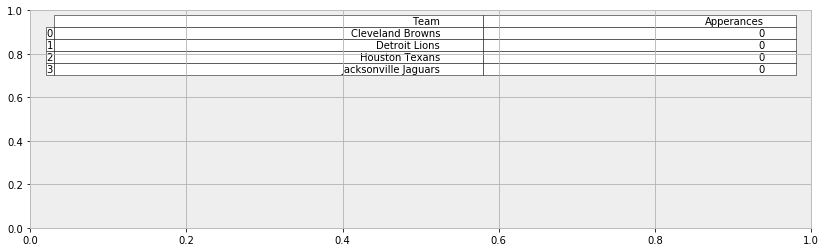

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(14, 4))
pd.plotting.table(axes, 
                  nvf,
                  loc='upper right',
                  colLoc='right',
                  colWidths=[0.55, 0.4, 0.8,0.8])